In [2]:
%pwd

'/home/tf'

In [3]:
% cd dl_fun

/home/tf/dl_fun


In [4]:
#%rm -r 03_wordCloud
#%mkdir 03_wordCloud

In [5]:
%cd 03_wordCloud/

/home/tf/dl_fun/03_wordCloud


In [7]:
%ls

constitution.txt


In [8]:
%mkdir outfile

In [16]:
# -*- coding = utf-8 -*-

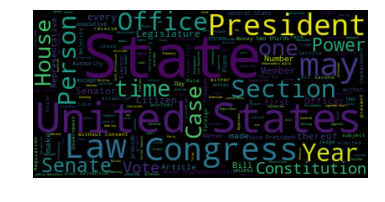

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = open('/home/tf/dl_fun/03_wordCloud/constitution.txt').read()
wc = WordCloud().generate(text)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [25]:
wc.to_file('/home/tf/dl_fun/03_wordCloud/outfile/wordcloud.png')

## Chinese Word Cloud

In [35]:
%ls

constitution.txt  Hiragino.ttf  outfile/  xyj.txt


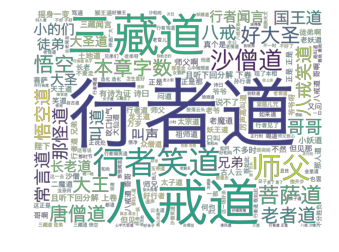

In [29]:
chinese_word_path  = './xyj.txt'
chinese_text = open(chinese_word_path).read()
chinese_wc = WordCloud(font_path = './Hiragino.ttf', 
                       width = 800 , height = 600 , 
                       mode = 'RGBA' , background_color = None).generate(chinese_text)
plt.imshow(chinese_wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Deal stop word by use jieba package

In [31]:
import jieba

In [32]:
chinese_jieba_text = ' '.join(jieba.cut(chinese_text))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.834 seconds.
Prefix dict has been built succesfully.


In [34]:
chinese_jieba_text[:100]

'\u3000 \u3000 [ 西游记   /   吴承恩 （ 明 ）   著   ] \n \n \u3000 \u3000 书籍 介绍 : \n \u3000 \u3000 《 西游记 》 以 丰富 瑰奇 的 想象 描写 了 师徒 四众 在 迢遥 的 西方 途上'

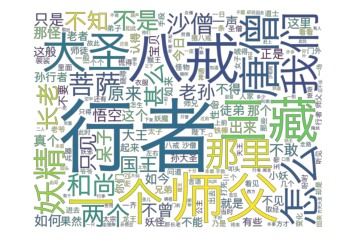

In [37]:
chinese_jieba_wc = WordCloud(font_path = './Hiragino.ttf' , 
                             mode = 'RGBA' ,
                             width = 800 , height = 600 , 
                             background_color = None).generate(chinese_jieba_text)
plt.imshow(chinese_jieba_wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Deal image by using mask parameter

In [54]:
from PIL import Image
import numpy as np

In [48]:
%ls

black_mask.png  constitution.txt  Hiragino.ttf  outfile/  xyj.txt


In [49]:
%pwd

'/home/tf/dl_fun/03_wordCloud'

In [52]:
mask = np.array(Image.open('./black_mask.png'))

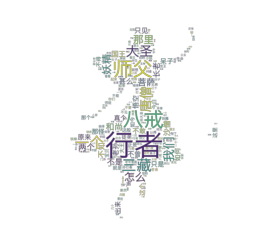

In [55]:
chinese_mast_wc = WordCloud(font_path = './Hiragino.ttf',
                            mask = mask , 
                            mode = 'RGBA',
                            background_color = None).generate(chinese_jieba_text)
plt.imshow(chinese_mast_wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [57]:
from wordcloud import ImageColorGenerator

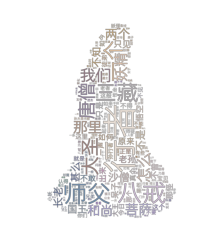

In [62]:
mask_re = np.array(Image.open('./color_mask.png'))
wc_re = WordCloud(font_path = './Hiragino.ttf',
                  mask = mask_re ,
                  mode = 'RGBA',
                  background_color = None).generate(chinese_jieba_text)
image_colors = ImageColorGenerator(mask_re)
wc_re.recolor(color_func = image_colors)
plt.imshow(wc_re , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [65]:
import random

In [66]:
def random_color(word , font_size , position, orientation , font_path , random_state):
    s = 'hsl(0 , %d%% , %d%%)' %(random.randint(60  , 80) , random.randint(60 , 80))
    return s

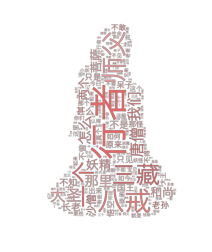

In [67]:
wc_recolor_random = WordCloud(color_func = random_color , 
                             font_path = './Hiragino.ttf' ,
                             mask = mask_re,
                             background_color = None,
                             mode = 'RGBA').generate(chinese_jieba_text)
plt.imshow(wc_recolor_random , interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Calculate each word weight by jieba and choose top 200 words sort by weight 

In [69]:
import jieba.analyse

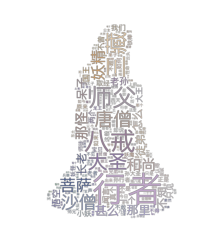

In [79]:
text_frequence = jieba.analyse.extract_tags(chinese_text , topK = 200 , withWeight=True)
text_frequence_dic = {i[0]: i[1] for i in text_frequence}

wc_frequence = WordCloud(mask = mask_re , 
                         color_func = image_colors,
                         mode = 'RGBA',
                         font_path = './Hiragino.ttf',
                         background_color  = None).generate_from_frequencies(text_frequence_dic)
plt.imshow(wc_frequence, interpolation = 'bilinear')
plt.axis('off')
plt.show()